In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25475,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6629,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

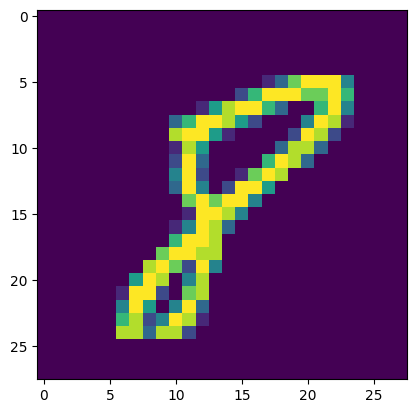

In [7]:
plt.imshow(df.iloc[18306, 1:].values.reshape(28,28));

In [8]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()
y_pred= knn.predict(X_test)
print(time.time() - start)

13.3885498046875


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [19]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 200)

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test_trf)

In [24]:
accuracy_score(y_test, y_pred)

0.9508333333333333

In [26]:
    # for i in range(1, 785):
    #     pca = PCA(n_components=i)
    #     X_train_trf = pca.fit_transform(X_train)
    #     X_test_trf = pca.transform(X_test)
    
    #     knn = KNeighborsClassifier()
    
    #     knn.fit(X_train_trf, y_train)
    
    #     y_pred = knn.predict(X_test_trf)
    
    #     print(accuracy_score(y_test, y_pred))

In [ ]:
from tqdm import tqdm  # Progress bar for faster iteration

best_accuracy = 0
best_components = 0
accuracies = []

for i in tqdm(range(10, 350)):  # Loop through 1 to 784 PCA components
    pca = PCA(n_components=i)
    
    # Transform data
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    # Train KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test_trf)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Track best accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_components = i

print(f"\nBest PCA Components: {best_components}, Best Accuracy: {best_accuracy:.4f}")

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(10, 5))
plt.plot(range(10, 350), accuracies, label="Accuracy", color="blue")
plt.axvline(best_components, color="red", linestyle="--", label=f"Best Components: {best_components}")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("PCA Components vs. KNN Accuracy")
plt.legend()
plt.show()


In [43]:
# Transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [44]:
X_train_trf

array([[-2.71863874, -0.48988286],
       [-0.67699326, -6.75327691],
       [-3.03322824,  6.51015659],
       ...,
       [ 2.1488469 ,  0.78081069],
       [ 1.05957198,  0.94721875],
       [17.70258141,  1.96143487]])

In [47]:
import plotly.express as px

y_train_trf = y_train.astype(str)  # Convert labels to string for coloring

fig = px.scatter(
    x = X_train_trf[:, 0],  # First feature / first PCA component
    y = X_train_trf[:, 1],  # Second feature / second PCA component
    color = y_train_trf,  # Color points based on class labels
    color_discrete_sequence = px.colors.qualitative.G10  # Set color scheme
)

fig.show()


In [48]:
# transforming in 3d
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [49]:
X_train_trf

array([[-2.71863588, -0.49004272,  1.1359317 ],
       [-0.67697676, -6.75215604, -2.3367558 ],
       [-3.03324545,  6.50963908,  7.49205078],
       ...,
       [ 2.14885175,  0.78108204, -0.74789221],
       [ 1.05956895,  0.94682353,  3.95065179],
       [17.70257645,  1.962051  , -4.94278174]])

In [50]:
# Convert labels to string for coloring
y_train_trf = y_train.astype(str)

# Create 3D Scatter Plot
fig = px.scatter_3d(
    x=X_train_trf[:, 0],  # First PCA component (or feature)
    y=X_train_trf[:, 1],  # Second PCA component
    z=X_train_trf[:, 2],  # Third PCA component
    color=y_train_trf,  # Color points based on class labels
)

# Fix margin formatting
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

# Show the plot
fig.show()


In [ ]:
pca.explained_variance_ # Here explained variance is nothing but Eigen values

array([40.67111197, 29.17023396, 26.74459585])

In [34]:
pca.components_ # This is Eigen values

array([[-1.01357373e-17,  2.64164420e-18,  2.27566560e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.41925632e-16, -6.92385832e-17, -5.87703190e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.02431159e-17, -1.03562850e-16, -6.16063735e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [35]:
pca.components_.shape

(3, 784)

In [40]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [41]:
(pca.explained_variance_ratio_)*100

array([5.78519225, 4.14926967, 3.80423896])

In [51]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [53]:
pca.explained_variance_.shape

(784,)

In [55]:
pca.components_.shape

(784, 784)

In [56]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [57]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

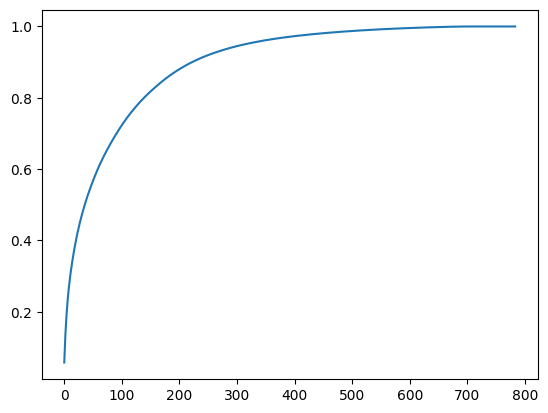

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

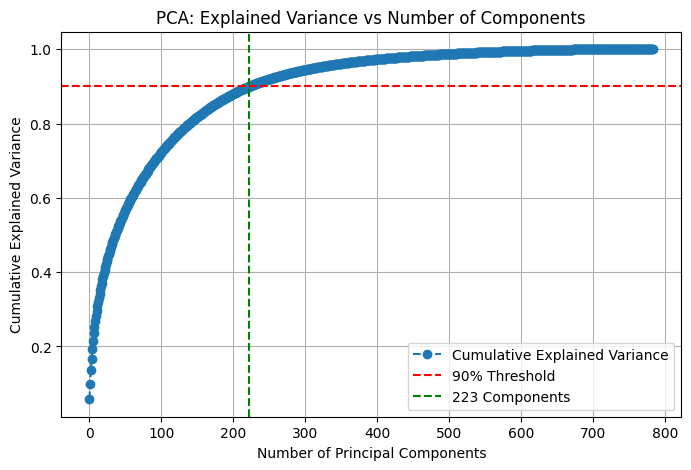

Number of components needed to explain 90% variance: 223


In [60]:
# Cumulative sum of explained variance
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% variance
num_components = np.argmax(cumsum_variance >= 0.90) + 1  # +1 because indexing starts at 0

# Plot the cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(cumsum_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=num_components-1, color='g', linestyle='--', label=f'{num_components} Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.legend()
plt.grid(True)

plt.show()

print(f"Number of components needed to explain 90% variance: {num_components}")
